<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/AF2_PDI_2062979.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Fundamental 2 - Procesamiento Digital de Imágenes**
Cinthia Janeth Pecina Hernández 2062979 IB

=== CONVERSIÓN DE FORMATO ===
No se encontró avion.webp, usando avion.jpg si existe

=== CARGA DE IMAGEN ===
Dimensiones: 2090x921 píxeles
Tipo de imagen: Escala de grises (8-bit)

=== PREPROCESAMIENTO ===

=== SEGMENTACIÓN ===

=== ANÁLISIS ===
Área del objeto: 146600 píxeles
Porcentaje de imagen ocupada: 7.62%

Objeto 7:
  Área: 143564.00 píxeles
  Perímetro: 9318.79 píxeles
  Bounding Box: 1859x704 píxeles
  Centroide: (1053, 552)


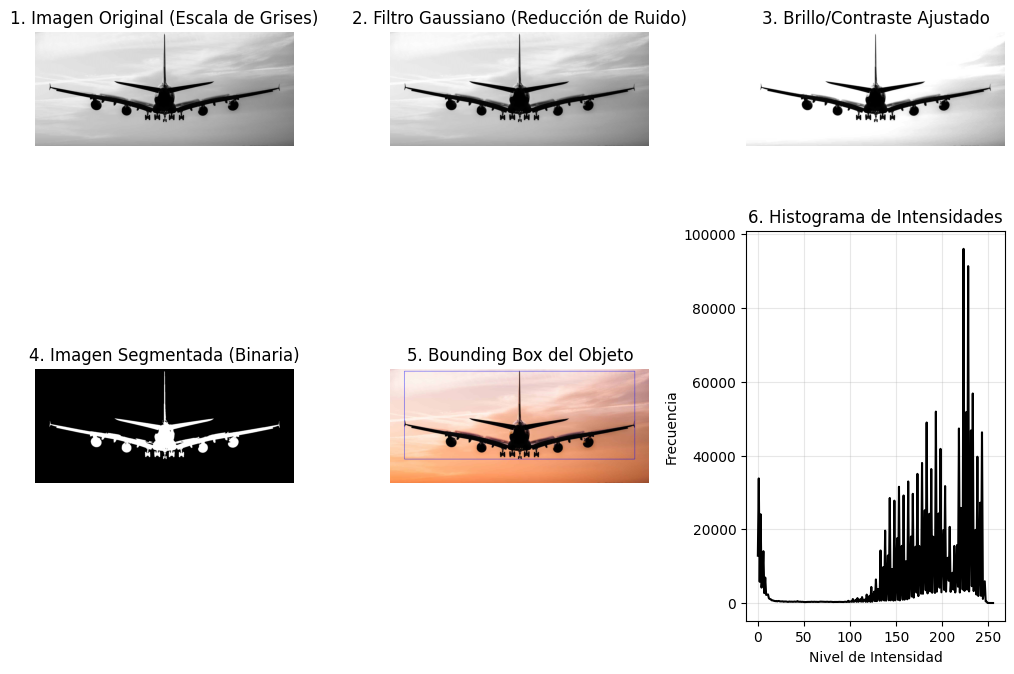


=== SEPARACIÓN DE CANALES RGB ===


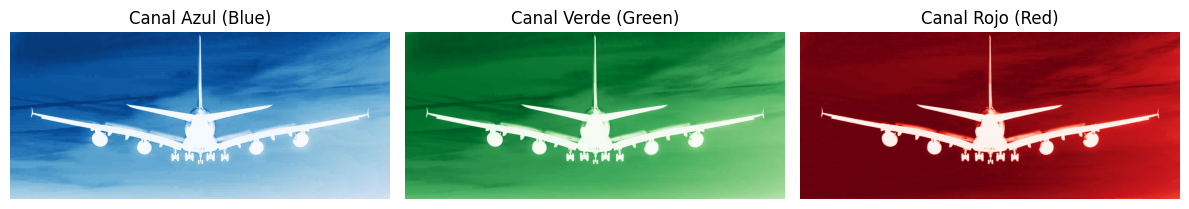

Canales RGB separados correctamente

=== PROCESO COMPLETADO ===


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== CONVERSIÓN DE FORMATO WEBP A JPG ==========
print("=== CONVERSIÓN DE FORMATO ===")

# Cargar la imagen en formato WEBP y convertir a JPG
imagen_webp = cv2.imread("avion.webp")
if imagen_webp is not None:
    cv2.imwrite("avion.jpg", imagen_webp, [cv2.IMWRITE_JPEG_QUALITY, 95])
    print("Conversión completada: avion.webp → avion.jpg")
else:
    print("No se encontró avion.webp, usando avion.jpg si existe")

# ===================  CARGA DE IMAGEN ============================
print("\n=== CARGA DE IMAGEN ===")

# Cargar la imagen en escala de grises
img_path = 'avion.jpg'
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó, si no marcar error
if img_gray is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta del archivo.")
    exit()

# Obtener w&h de la imagen
height, width = img_gray.shape
print(f"Dimensiones: {width}x{height} píxeles")
print(f"Tipo de imagen: Escala de grises (8-bit)")

# Mostrar la imagen original en escala de grises
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('1. Imagen Original (Escala de Grises)')
plt.axis('off')

# ========== PREPROCESAMIENTO: REDUCCIÓN DE RUIDO ==========
print("\n=== PREPROCESAMIENTO ===")

# Aplicar filtro Gaussiano para reducir el ruido
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)  # Suavizado con un kernel de 5x5

plt.subplot(2, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title('2. Filtro Gaussiano (Reducción de Ruido)')
plt.axis('off')

# ========== PREPROCESAMIENTO: AJUSTE DE BRILLO Y CONTRASTE ==========
# Ajustar brillo y contraste
img_adjusted = cv2.convertScaleAbs(img_blur, alpha=1.3, beta=20)

plt.subplot(2, 3, 3)
plt.imshow(img_adjusted, cmap='gray')
plt.title('3. Brillo/Contraste Ajustado')
plt.axis('off')

# ========== SEGMENTACIÓN: UMBRALIZACIÓN ==========
print("\n=== SEGMENTACIÓN ===")

# Definir un umbral para segmentación
threshold = 127  # Ajustar según la imagen
_, img_bin = cv2.threshold(img_adjusted, threshold, 255, cv2.THRESH_BINARY_INV)

plt.subplot(2, 3, 4)
plt.imshow(img_bin, cmap='gray')
plt.title('4. Imagen Segmentada (Binaria)')
plt.axis('off')

# ========== ANÁLISIS: CONTORNOS Y MEDICIONES ==========
print("\n=== ANÁLISIS ===")

# Contar píxeles del objeto segmentado
total_pixels = img_bin.size
object_pixels = np.count_nonzero(img_bin)

print(f'Área del objeto: {object_pixels} píxeles')
print(f'Porcentaje de imagen ocupada: {object_pixels/total_pixels*100:.2f}%')

# Encontrar contornos y obtener el rectángulo más pequeño que encierra el objeto
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Procesar cada contorno encontrado
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > 1000:  # Filtrar contornos pequeños
        # Calcular perímetro
        perimeter = cv2.arcLength(contour, True)

        # Obtener bounding box
        x, y, w, h = cv2.boundingRect(contour)

        # Calcular centroide
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])

        print(f'\nObjeto {i+1}:')
        print(f'  Área: {area:.2f} píxeles')
        print(f'  Perímetro: {perimeter:.2f} píxeles')
        print(f'  Bounding Box: {w}x{h} píxeles')
        print(f'  Centroide: ({cx}, {cy})')

# Dibujar el bounding box en la imagen original
img_color = cv2.imread(img_path)
img_bounding = img_color.copy()

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_bounding, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img_bounding, cv2.COLOR_BGR2RGB))
plt.title('5. Bounding Box del Objeto')
plt.axis('off')

# ========== ANÁLISIS: HISTOGRAMA ==========
plt.subplot(2, 3, 6)
histogram = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(histogram, color='black')
plt.title('6. Histograma de Intensidades')
plt.xlabel('Nivel de Intensidad')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========== SEPARACIÓN DE CANALES RGB ==========
print("\n=== SEPARACIÓN DE CANALES RGB ===")

if img_color is not None:
    # Separar los canales de la imagen RGB
    b, g, r = cv2.split(img_color)

    # Mostrar los canales separados
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(b, cmap='Blues')
    plt.title('Canal Azul (Blue)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(g, cmap='Greens')
    plt.title('Canal Verde (Green)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(r, cmap='Reds')
    plt.title('Canal Rojo (Red)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Canales RGB separados correctamente")

print("\n=== PROCESO COMPLETADO ===")